In [17]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt

#Should put the file here.
#url = 'https://uu-sml.github.io/course-sml-public/data/HappinessData.csv'


happy = pd.read_csv("data/HappinessData.csv",delimiter=';')
# Preview the first 5 lines of the loaded data 
happy.head()

happy.rename(columns = {'Social support':'SocialSupport'}, inplace = True) 
happy.rename(columns = {'Life Ladder': 'LifeLadder'}, inplace = True) 
happy.rename(columns = {'Perceptions of corruption':'Corruption'}, inplace = True) 
happy.rename(columns = {'Log GDP per capita': 'LogGDP'}, inplace = True) 
happy.rename(columns = {'Healthy life expectancy at birth': 'LifeExp'}, inplace = True) 
happy.rename(columns = {'Freedom to make life choices': 'Freedom'}, inplace = True) 


# 7.1 Happiness

In this exercise, we will try to understand what makes people happy using machine learning. We will also learn the limitations in understanding happiness with a machine.


Load the dataset `'data/HappinessData.csv'`. Familiarize yourself with the dataset using `happy.info()`. The dataset:  
## (a)
Plot a few variables to get a feeling fo the data.

In [24]:
# Display header

df=happy.loc[happy['Year'] == 2018]
df.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 10 to 1703
Data columns (total 26 columns):
Country name                                                136 non-null object
Year                                                        136 non-null int64
LifeLadder                                                  136 non-null float64
LogGDP                                                      127 non-null float64
SocialSupport                                               136 non-null float64
LifeExp                                                     132 non-null float64
Freedom                                                     136 non-null float64
Generosity                                                  126 non-null float64
Corruption                                                  129 non-null float64
Positive affect                                             135 non-null float64
Negative affect                                             135 non-null float64
Confi

## (b)
Divide the data set randomly into two approximately equally sized subsets, `train` and `test` by generating the random indices using `np.random.choice()`.


In [35]:
# Set seed to get reproducible results
np.random.seed(2)
print(f"happy.shape: {df.shape}") #(No. of rows, No. of columns)
trainI = np.random.choice(df.shape[0], size=122, replace=False)
trainIndex = df.index.isin(trainI)
train = df.iloc[trainIndex]
test = df.iloc[~trainIndex]


happy.shape: (136, 26)
141     6.892172
153     5.819827
169     5.915734
180     5.887401
191     3.461366
          ...   
1654    5.005663
1667    5.295547
1678    3.057514
1690    4.041488
1703    3.616480
Name: LifeLadder, Length: 126, dtype: float64


## (c)
Perform linear regression with `mpg` as the output and all other variables except name as input. How well (in terms of root-mean-square-error) does the model perform on test data and training data, respectively?


In [33]:
# Ignore RuntimeWarning: internal gelsd driver lwork query error. Harmless

factors =['LogGDP', 'SocialSupport', 'LifeExp',  'Freedom', 'Generosity', 'Corruption']


# Linear regression
model = skl_lm.LinearRegression(fit_intercept = True)      # Add an offset   
X_train = train[factors]
Y_train = train['LifeLadder']

X_train.head()

model.fit(X_train, Y_train)
print(model)

# Evaluate on training data
train_predict = model.predict(X_train)
train_RMSE = np.sqrt(np.mean((train_predict - train.LifeLadder)**2))
print(f'Train RMSE:\t{train_RMSE:.4f}')  

## Evaluate on test data
X_test = test[factors]
test_predict = model.predict(X_test)
test_RMSE = np.sqrt(np.mean((test_predict - test.Lifeladder)**2))
print(f'Test RMSE:\t{test_RMSE:.4f}')


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Train RMSE:	0.1574


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## (d)
Now, consider the input variable `origin`. What do the different numbers represent? By running `auto.origin.sample(30)` we see the 30 samples of the variable and that the input variables is quantitative. Does it really makes sense to treat it as a quantitative input? Use `pd.get_dummies()` to split it into dummy variables and do the linear regression again.


In [13]:
# Examples of the origin variable
print('auto origin:')
print(auto.origin.sample(30).tolist(), '\n')

X_train = pd.get_dummies(train, columns=['origin']) 
print('X after transformation (origin has been split in three dummy variables):')
print(X_train.head(), '\n')
# Pick out the input variables
X_train = X_train[['cylinders', 'displacement', 'horsepower', 'weight',\
                   'acceleration', 'year', 'origin_1', 'origin_2', 'origin_3']]

X_test = pd.get_dummies(test, columns=['origin'])
X_test = X_test[['cylinders', 'displacement', 'horsepower', 'weight',\
                 'acceleration', 'year', 'origin_1', 'origin_2', 'origin_3']]

# look at how sci-kit learn transforms the qualitative input
print(X_train.sample(5), '\n') 

# Repeat c) create and evaluate the model now using encoded categorical data
model1 = skl_lm.LinearRegression()
model1.fit(X_train, Y_train)
print(model1,'\n')

# Evaluate on training data
train_predict = model1.predict(X_train)
train_RMSE = np.sqrt(np.mean((train_predict - train.mpg)**2))
print(f'Train RMSE:\t{train_RMSE:.4f}')

## Evaluate on test data
test_predict = model1.predict(X_test)
test_RMSE = np.sqrt(np.mean((test_predict - test.mpg)**2))
print(f'Test RMSE:\t{test_RMSE:.4f}')


auto origin:
[1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 3, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3] 

X after transformation (origin has been split in three dummy variables):
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   
5  15.0          8         429.0       198.0    4341          10.0    70   
6  14.0          8         454.0       220.0    4354           9.0    70   
8  14.0          8         455.0       225.0    4425          10.0    70   

                        name  origin_1  origin_2  origin_3  
0  chevrolet chevelle malibu         1         0         0  
4                ford torino         1         0         0  
5           ford galaxie 500         1         0         0  
6           chevrolet impala         1         0         0  
8           pontiac catalina         1         0         0 

## (e)
Try obtain a better RMSE on test data by removing some inputs (explore what happens if you remove, e.g, `year`, `weight` and `acceleration`)

In [14]:
# First write a funcion that takes the prediction model, training and test data
# and computes RMSE to simplify the process

def computeRMSE(model, X, Y):
    Y_predict = model.predict(X)
    RMSE = np.sqrt(np.mean((Y_predict - Y)**2))
    return RMSE

# The following function streamlines the procedure of testing with dropping
# different varibles. It is optional. But if you want to skip the function
# keep in mind that when you declare e.g. X=X.drop(columns=column_name), 
# you are manipulating the original X
def RMSE_with_drop_col(model, X, Y, X_test, Y_test, drop_col):
    # drop_col takes a list of string or strings
    print(f'Results without the variable {drop_col}:')
    X = X.drop(columns=drop_col)
    model.fit(X, Y)
    train_RMSE = computeRMSE(model, X, Y)
    print(f'Train RMSE: \t{train_RMSE:.4f}')
    
    X_test = X_test.drop(columns=drop_col)
    test_RMSE = computeRMSE(model, X_test, Y_test)
    print(f'Test RMSE:\t{test_RMSE:.4f}')
    print()

# Test output (has not been declared)
Y_test = test.mpg
    
# Remove weight
model2 = skl_lm.LinearRegression()
RMSE_with_drop_col(model2, X_train, Y_train, X_test, Y_test,\
                   ['weight', 'acceleration'])

# Remove year
model3 = skl_lm.LinearRegression()
RMSE_with_drop_col(model3, X_train, Y_train, X_test, Y_test, ['year'])

# Remove acceleration
model4 = skl_lm.LinearRegression()
RMSE_with_drop_col(model4, X_train, Y_train, X_test, Y_test, ['acceleration'])


Results without the variable ['weight', 'acceleration']:
Train RMSE: 	3.7496
Test RMSE:	3.8356

Results without the variable ['year']:
Train RMSE: 	4.1714
Test RMSE:	4.0975

Results without the variable ['acceleration']:
Train RMSE: 	3.2650
Test RMSE:	3.3122



## (f)
Try to obtain a better RMSE on test data by adding some transformations of inputs, such as 
$log(x)$, $\sqrt{x}$, $x_1x_2$ etc.


In [15]:
# A small function to simplify the process
def RMSE_with_cols(model, X, Y, cols):
    print(f'RMSE with the variables {cols}')
    X = X[cols]
    model.fit(X, Y)
    RMSE = computeRMSE(model, X, Y)
    print(f'RMSE\t{RMSE:.4f}')

# horsepower*acceleration
print('comp = horsepower * acceleration')
model = skl_lm.LinearRegression()
X_train_copy = X_train.copy()     # A hard copy to avoid manipulating the original X
X_train_copy['comp'] = X_train_copy.horsepower * X_train_copy.acceleration
cols = ['cylinders', 'displacement','comp', 'origin_1', 'origin_2', 'origin_3']
RMSE_with_cols(model, X_train_copy, Y_train, cols)

print()

# sqrt(horsepower) and weight^2
print('sqrt(horsepower) and weight^2')
model = skl_lm.LinearRegression()
X_train_copy = X_train.copy()
X_train_copy['sqrt_horsepower'] = np.sqrt(X_train_copy.horsepower) 
X_train_copy['weight_sqr'] = X_train_copy.weight**2
cols = ['cylinders', 'displacement','sqrt_horsepower', 'weight_sqr',\
        'origin_1', 'origin_2', 'origin_3']
RMSE_with_cols(model, X_train_copy, Y_train, cols)

comp = horsepower * acceleration
RMSE with the variables ['cylinders', 'displacement', 'comp', 'origin_1', 'origin_2', 'origin_3']
RMSE	4.1873

sqrt(horsepower) and weight^2
RMSE with the variables ['cylinders', 'displacement', 'sqrt_horsepower', 'weight_sqr', 'origin_1', 'origin_2', 'origin_3']
RMSE	4.1824


# 2.4 Nonlinear transformations of input variables

In [16]:
#Start by running the following code to generate your training data
np.random.seed(1)
x_train = np.random.uniform(0, 10, 100)
y_train = .4 \
          - .6 * x_train \
          + 3. * np.sin(x_train - 1.2) \
          + np.random.normal(0, 0.1, 100)

## (a) 
Plot the training output `y_train` versus the training input `x_train`.  

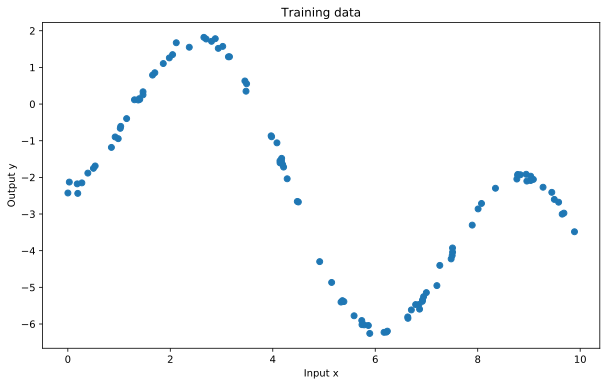

In [17]:
# Plot
plt.plot(x_train, y_train, 'o')
plt.title('Training data')
plt.xlabel('Input x')
plt.ylabel('Output y');

## (b) 
Learn a model on the form 
$$
y= a + bx + c \sin(x + \phi) + \epsilon,  \qquad  \epsilon \sim \mathcal{N}(0, 0,1^2) \qquad (2.1)
$$

where all parameters $a$, $b$, $c$ and $\phi$ are to be learned from the training data `x_train` and `y_train`. Refrain from using the` linear_model()` command, but implement the normal equations yourself as in problem 2.1. Hint: Even though (2.1) is not a linear regression model, you can use the fact that $c \sin(x + \phi) = c \cos(\phi) \sin(x) + c \sin(\phi) \cos(x)$ to transform it into one.  


In [18]:
X_train = np.column_stack([np.ones(100), x_train,\
                           np.cos(x_train), np.sin(x_train)])
#y_train = np.array(y_train).reshape(-1, 1)
theta_hat = np.linalg.solve(X_train.T@X_train, X_train.T@y_train)
print(f'theta_hat ={theta_hat}')

theta_hat =[ 0.421 -0.603 -2.789  1.088]


## (c) 
Construct 100 test inputs `x_test` in the span from 0 to 10 by using the `np.linspace()` function. Predict the outputs corresponding to these inputs and plot them together with the training data.

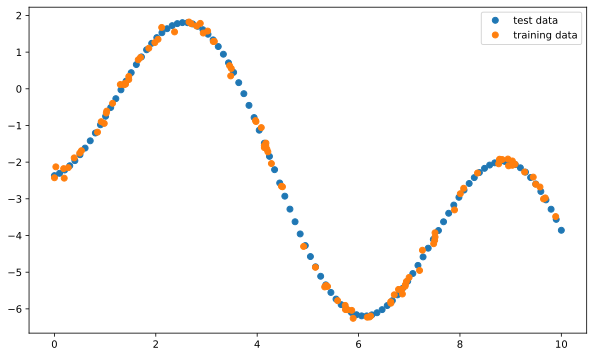

In [19]:
# c) Do prediction
x_test = np.linspace(0, 10, 100)
X_test = np.column_stack([np.ones(100), x_test, np.cos(x_test), np.sin(x_test)])
y_test_hat = X_test@theta_hat
plt.plot(x_test, y_test_hat, 'o', label='test data')
plt.plot(x_train, y_train, 'o', label='training data')
plt.legend();

## (d) 
Do a least squares fit by instead using the `linear_model()` function in `Python`. Check that you get the same estimates as in (b).

In [20]:
model = skl_lm.LinearRegression()
model.fit(X_train[:,1:], y_train)
prediction = model.predict(X_test[:,1:])

# Compute root mean squared error of predictions and learned theta
print(f"RMS y_test_hat:\t{np.sqrt(np.mean(np.square(prediction-y_test_hat)))}")
print(f"RMS theta_hat:\t{np.sqrt(np.mean(np.square(theta_hat - np.hstack((model.intercept_, model.coef_)))))}")


RMS y_test_hat:	1.5840240990675618e-15
RMS theta_hat:	1.0418512929668255e-15


# 2.5  Regularization

In this exercise we will apply Ridge regression and Lasso for fitting a polynomial to a scalar data set. We will have a setting where we first generate synthetic training data from 
<a id=2.2></a>$$
y = x^3 + 2x^2 + 6 + \epsilon, \qquad (2.2)
$$
and later try to learn model for the data.   

## (a) <a id='2.5-a'></a>
Write a function that implements the polynomial [(2.2)](#2.2), i.e., takes $x$ as argument and returns $x^3 + 2x^2 + 6$. 

In [21]:
def f(x):
    return x**3 + 2*x**2 + 6

## (b) 
Use `np.random.seed()` to set the random seed. Use the function `np.linspace()` to construct a vector `x` with `n = 12` elements equally spaced from $-2.3$ to $1$. Then use your function from [(a)](#2.5-a) to construct a vector $\textbf{y} = [y_1, ..., y_n]^T$ with 12 elements, where $y = x^3 + 2x^2 + 6 + \epsilon$, with $\epsilon \sim  \mathcal{N(0, 1^2)}$. This is our training data.

In [22]:
np.random.seed(0)
x_train = np.linspace(-2.3, 1, 12)
y_train = f(x_train) + np.random.normal(0, 1, 12)

## (c) 
Plot the training data $\mathcal{T} = \{x_i, y_i\}_{i=1}^{12}$ together with the "true" function.

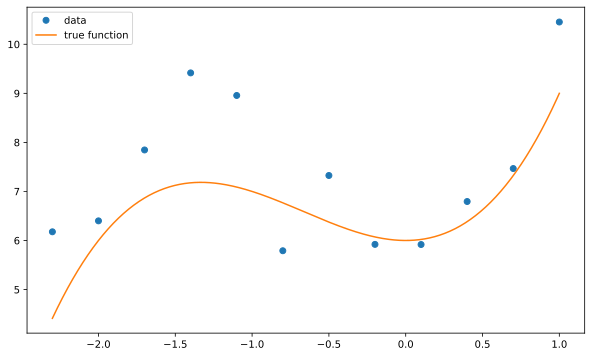

In [23]:
x_test = np.linspace(-2.3, 1, 400)
y_test = f(x_test)

plt.plot(x_train, y_train, 'o', label='data')
plt.plot(x_test, y_test, label='true function')
plt.legend()
plt.show()

## (d)
Fit a straight line to the data with $y$ as output and $x$ as input and plot the predicted output $\hat{y}_{\star}$ for densely spaced $x_{\star}$ values between $-2.3$ and $1$. Plot these predictions in the same plot window.

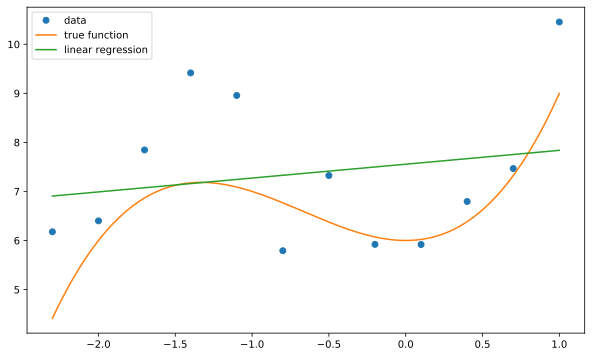

In [24]:
# Linear regression
model = skl_lm.LinearRegression()
model.fit(x_train.reshape(-1,1), y_train)
prediction = model.predict(x_test.reshape(-1,1))

# Plots
plt.plot(x_train, y_train, 'o', label='data')
plt.plot(x_test, y_test, label='true function')
plt.plot(x_test, prediction, label='linear regression')

plt.legend()
plt.show()

## (e) 
Fit an 11th degree polynomial to the data with linear regression. Plot the corresponding predictions.

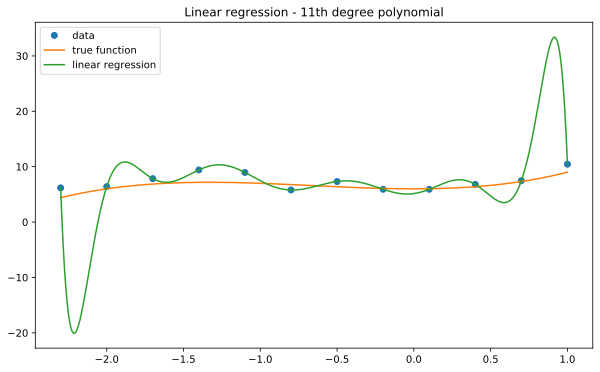

In [25]:
# x^[0, 1, 2,..., 11]
x_train_ext = np.power(x_train.reshape(-1,1), np.arange(12))
x_test_ext = np.power(x_test.reshape(-1,1), np.arange(12))

model = skl_lm.LinearRegression()
model.fit(x_train_ext, y_train)
prediction = model.predict(x_test_ext)

# Plots
plt.plot(x_train, y_train, 'o', label='data')
plt.plot(x_test, y_test, label='true function')
plt.plot(x_test, prediction, label='linear regression')

plt.title('Linear regression - 11th degree polynomial')
plt.legend()
plt.show()
# Fitting an 11th degree polynomial to the data gives zero training error but has overfitted on training data.

## (f) 

Use the fucntion `sklearn.linear_model.Ridge` and `sklearn.linear_model.Lasso` to fit a 11th degree polynomial. Also inspect the estimated coefficients. Try different values of penalty term $\alpha$. What do you observe?


Model coefficients:
α = 0
[   0.       3.866   43.648  -21.823 -267.289 -103.323  462.711  417.687
 -115.039 -277.961 -120.216  -16.951]
α = 1
[ 0.     0.24   0.757 -0.051  0.797 -0.042  0.51   0.385  0.013  0.564
  0.472  0.097]
α = 10
[0.    0.1   0.284 0.04  0.326 0.035 0.283 0.131 0.14  0.269 0.118 0.013]
α = 100
[ 0.     0.013  0.05  -0.003  0.067 -0.016  0.073 -0.008  0.043  0.049
 -0.016 -0.011]
α = 1000
[ 0.     0.     0.006 -0.002  0.009 -0.005  0.011 -0.004  0.006  0.007
 -0.007 -0.003]


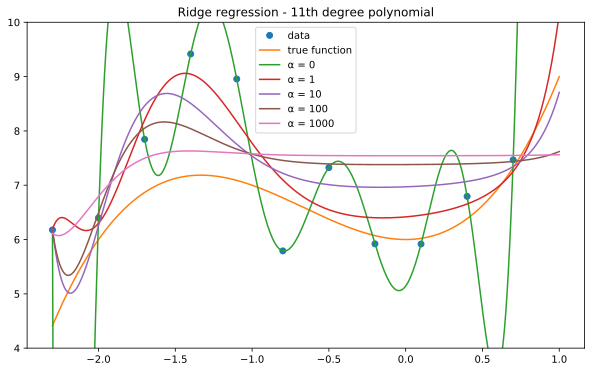

In [26]:
# Ridge

plt.plot(x_train, y_train, 'o', label='data')
plt.plot(x_test, y_test, label='true function')
print('Model coefficients:')
for alpha in [0, 1, 10, 100, 1000]:
    model = skl_lm.Ridge(alpha=alpha)    
    model.fit(x_train_ext, y_train)
    print(f'\u03b1 = {alpha}')
    print(model.coef_)

    prediction = model.predict(x_test_ext)
  
    plt.plot(x_test, prediction, label=f'\u03b1 = {alpha}')

plt.title('Ridge regression - 11th degree polynomial')
plt.ylim([4,10])
plt.legend()
plt.show()

Model coefficients:
α = 0.001: [ 0.000e+00  4.025e-01  3.781e+00  4.316e-01 -3.597e-01  2.060e-01
 -1.741e-02  3.742e-03  3.589e-03 -1.815e-03  9.611e-04 -3.874e-04]
α = 0.1: [ 0.000e+00  1.757e-01  2.201e+00  0.000e+00  1.995e-01  4.209e-01
  0.000e+00  1.858e-02  3.575e-03 -1.737e-03  1.491e-03 -4.590e-04]
α = 1: [ 0.     0.     0.    -0.     0.    -0.     0.    -0.     0.     0.003
 -0.    -0.   ]
α = 10: [ 0.  0.  0. -0.  0.  0. -0.  0. -0.  0. -0.  0.]


/home/johan/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/johan/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/johan/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


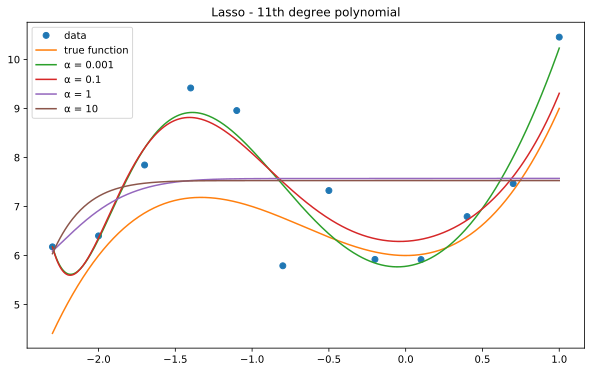

In [27]:
# Lasso
plt.plot(x_train, y_train, 'o', label='data')
plt.plot(x_test, y_test, label='true function')
print("Model coefficients:")
for alpha in [0.001, 0.1, 1, 10]:
    model = skl_lm.Lasso(alpha=alpha)
    model.fit(x_train_ext, y_train)
    print(f'\u03b1 = {alpha}:', model.coef_)
    
    prediction = model.predict(x_test_ext)
    plt.plot(x_test, prediction, label=f'\u03b1 = {alpha}')

    plt.title('Lasso - 11th degree polynomial')
plt.legend()
plt.show()

In [28]:
# α = 0.01 seems to give a good results for both ridge regression and LASSO.
# For both ridge regression and LASSO all coefficient except the first four 
# are very small. Consequently, the remaining coefficients could be decreased
# without increasing the training error too much. This is natural since the 
# data was generated from a third degree polynomial. For Lasso, some 
# coefficients are estimated to be exactly equal to zero, which is a property 
# of Lasso.